# Numeryczne rozwiązywanie równań różniczkowych
Paweł Skierkowski
## Implementacja:

In [147]:
import numpy as np
import matplotlib.pyplot as plt

### Metoda Eulera

In [155]:
def euler(x0, y0, h, iters, f):
    x, y = x0, y0
    x_vec, y_vec = np.zeros(iters), np.zeros(iters)
    x_vec[0], y_vec[0] = x, y
    for i in range(1, iters):
        y += h * f(x, y)
        x += h
        x_vec[i], y_vec[i] = x, y
    return x_vec, y_vec


y,x = euler(1,0.5,0.1, 5,lambda x,y: 3*x*y**2)
print("x:",x)
print("y:",y)

x: [0.5        0.575      0.68410625 0.85258674 1.13607936]
y: [1.  1.1 1.2 1.3 1.4]


### Metoda zmodywikowana Eulera

In [157]:
def euler_mod(x0, y0, h, iters, f):
    x, y = x0, y0
    x_vec, y_vec = np.zeros(iters), np.zeros(iters)
    x_vec[0], y_vec[0] = x, y
    for i in range(1, iters):
        y += h * f(x + 0.5*h, y + 0.5*h*f(x, y))
        x += h
        x_vec[i], y_vec[i] = x, y
    return x_vec, y_vec


y,x = euler_mod(1,0.5,0.1, 5,lambda x,y: 3*x*y**2)
print("x:",x)
print("y:",y)

x: [0.5        0.59100547 0.73615771 0.99680658 1.57087001]
y: [1.  1.1 1.2 1.3 1.4]


### Metoda Heun'a

In [159]:
def heun(x0, y0, h, iters, f):
    x, y = x0, y0
    x_vec, y_vec = np.zeros(iters), np.zeros(iters)
    x_vec[0], y_vec[0] = x, y
    for i in range(1, iters):
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
        x_vec[i], y_vec[i] = x, y
    return x_vec, y_vec


y,x = euler_mod(1,0.5,0.1, 5,lambda x,y: 3*x*y**2)
print("x:",x)
print("y:",y)

x: [0.5        0.59100547 0.73615771 0.99680658 1.57087001]
y: [1.  1.1 1.2 1.3 1.4]


### Metoda Rungego-Kutty

In [161]:
def rk4(x0, y0, h, iters, f):
    x, y = x0, y0
    x_vec, y_vec = np.zeros(iters), np.zeros(iters)
    x_vec[0], y_vec[0] = x, y
    for i in range(1, iters):
        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.5*h, y + 0.5*h*k2)
        k4 = f(x + h, y + h*k3)
        y += h / 6 * (k1 + 2*k2 + 2*k3 + k4)
        x += h
        x_vec[i], y_vec[i] = x, y
    return x_vec, y_vec


y,x = euler_mod(1,0.5,0.1, 5,lambda x,y: 3*x*y**2)
print("x:",x)
print("y:",y)

x: [0.5        0.59100547 0.73615771 0.99680658 1.57087001]
y: [1.  1.1 1.2 1.3 1.4]


## Analiza
### Założenia:

In [164]:
f = lambda x,y: 4*x/((1+x**2)**(1/3))
g = lambda x: 3*(1+x**2)**(2/3) - 2.772
x0=-2
y0=6
x_end=2

### Dla h=0.5

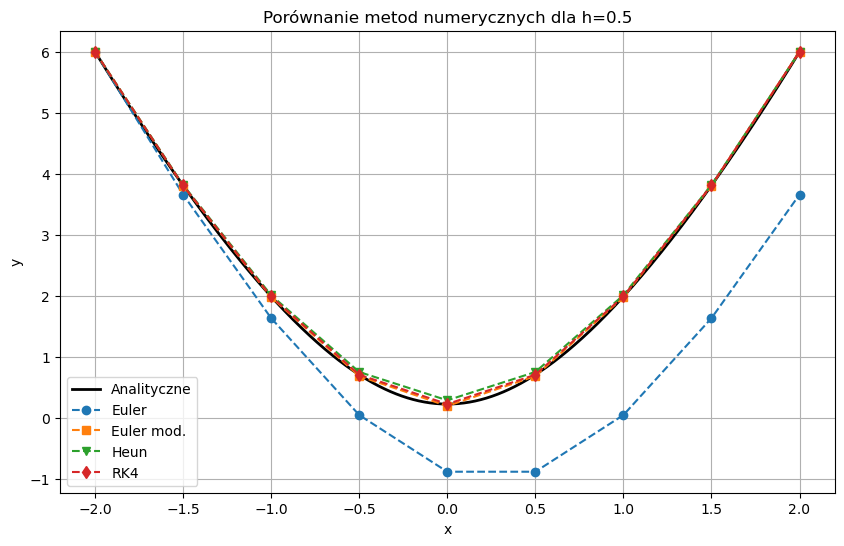

   Metoda  Maksymalny błąd
    Euler         2.339267
Euler_mod         0.031071
     Heun         0.061355
      RK4         0.000262


In [192]:
h = 0.5
iters = int(abs(x_end - x0) / h) + 1

x_exact = np.linspace(x0, x_end, 1000)
y_exact = g(x_exact)

x_e, y_e = euler(x0, y0, h, iters, f)
x_em, y_em = euler_mod(x0, y0, h, iters, f)
x_h, y_h = heun(x0, y0, h, iters, f)
x_rk, y_rk = rk4(x0, y0, h, iters, f)

plt.figure(figsize=(10,6))
plt.plot(x_exact, y_exact, label="Analityczne", color="black", linewidth=2)
plt.plot(x_e, y_e, 'o--', label="Euler")
plt.plot(x_em, y_em, 's--', label="Euler mod.")
plt.plot(x_h, y_h, 'v--', label="Heun")
plt.plot(x_rk, y_rk, 'd--', label="RK4")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod numerycznych dla h=0.5')
plt.show()

errors = {
    'Euler': np.max(np.abs(y_e - g(x_e))),
    'Euler_mod': np.max(np.abs(y_em - g(x_em))),
    'Heun': np.max(np.abs(y_h - g(x_h))),
    'RK4': np.max(np.abs(y_rk - g(x_rk))),
}

import pandas as pd
df = pd.DataFrame(errors.items(), columns=['Metoda', 'Maksymalny błąd'])
print(df.to_string(index=False))


### Dla h=0.1

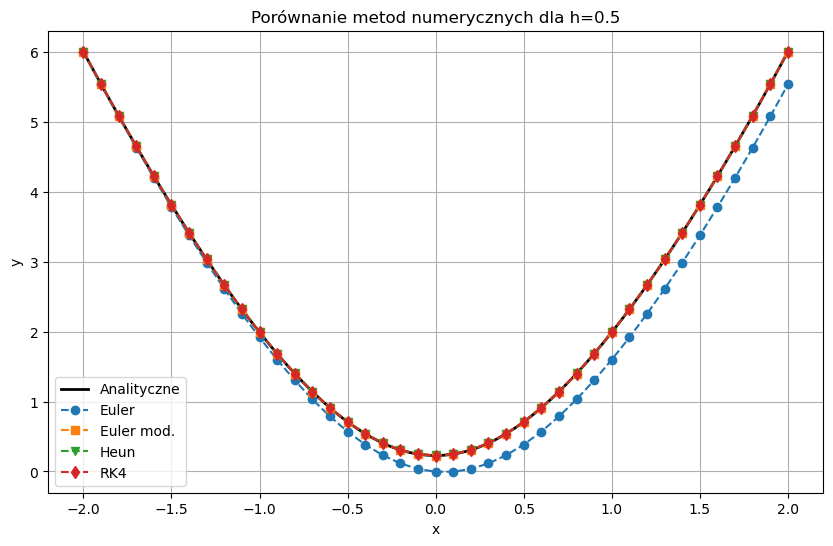

   Metoda  Maksymalny błąd
    Euler         0.467896
Euler_mod         0.001266
     Heun         0.002372
      RK4         0.000054


In [188]:
h = 0.1
iters = int(abs(x_end - x0) / h) + 1

x_exact = np.linspace(x0, x_end, 1000)
y_exact = g(x_exact)

x_e, y_e = euler(x0, y0, h, iters, f)
x_em, y_em = euler_mod(x0, y0, h, iters, f)
x_h, y_h = heun(x0, y0, h, iters, f)
x_rk, y_rk = rk4(x0, y0, h, iters, f)

plt.figure(figsize=(10,6))
plt.plot(x_exact, y_exact, label="Analityczne", color="black", linewidth=2)
plt.plot(x_e, y_e, 'o--', label="Euler")
plt.plot(x_em, y_em, 's--', label="Euler mod.")
plt.plot(x_h, y_h, 'v--', label="Heun")
plt.plot(x_rk, y_rk, 'd--', label="RK4")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod numerycznych dla h=0.5')
plt.show()

errors = {
    'Euler': np.max(np.abs(y_e - g(x_e))),
    'Euler_mod': np.max(np.abs(y_em - g(x_em))),
    'Heun': np.max(np.abs(y_h - g(x_h))),
    'RK4': np.max(np.abs(y_rk - g(x_rk))),
}

import pandas as pd
df = pd.DataFrame(errors.items(), columns=['Metoda', 'Maksymalny błąd'])
print(df.to_string(index=False))

### Dla h=0.01

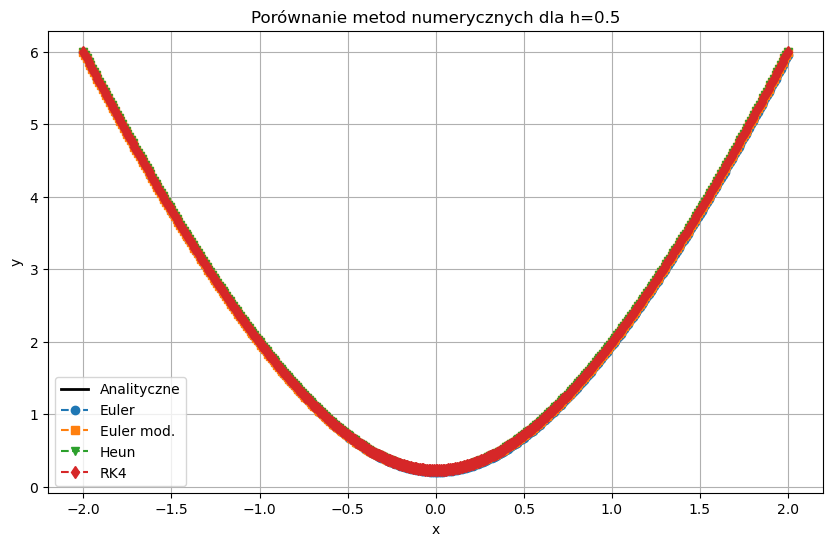

   Metoda  Maksymalny błąd
    Euler         0.046837
Euler_mod         0.000065
     Heun         0.000053
      RK4         0.000053


In [190]:
h = 0.01
iters = int(abs(x_end - x0) / h) + 1

x_exact = np.linspace(x0, x_end, 1000)
y_exact = g(x_exact)

x_e, y_e = euler(x0, y0, h, iters, f)
x_em, y_em = euler_mod(x0, y0, h, iters, f)
x_h, y_h = heun(x0, y0, h, iters, f)
x_rk, y_rk = rk4(x0, y0, h, iters, f)

plt.figure(figsize=(10,6))
plt.plot(x_exact, y_exact, label="Analityczne", color="black", linewidth=2)
plt.plot(x_e, y_e, 'o--', label="Euler")
plt.plot(x_em, y_em, 's--', label="Euler mod.")
plt.plot(x_h, y_h, 'v--', label="Heun")
plt.plot(x_rk, y_rk, 'd--', label="RK4")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod numerycznych dla h=0.5')
plt.show()

errors = {
    'Euler': np.max(np.abs(y_e - g(x_e))),
    'Euler_mod': np.max(np.abs(y_em - g(x_em))),
    'Heun': np.max(np.abs(y_h - g(x_h))),
    'RK4': np.max(np.abs(y_rk - g(x_rk))),
}

import pandas as pd
df = pd.DataFrame(errors.items(), columns=['Metoda', 'Maksymalny błąd'])
print(df.to_string(index=False))

### Wnioski
Na podstawie wykresów oraz tabel błędów można stwierdzić, że:
- metoda Eulera jest najmniej dokładna
- metoda zmodyfikowana Eulera jest zdecydowanie lepsza od metody Eulera, wypada podobnie do metody Heuna
- metoda RK4 (Rungego-Kutty) jest najdokładniejsza, najbardziej zbliżona do rozwiązania analitycznego
- bardzo duży wpływ na wyniki ma krok integracji h, im mniejsza h tym dokładniejsze wyniki
- dla h=0.01 wyniki są bardzo dobre, zaimplementowane metody zwracają niemal dokładny wynik